In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

In [ ]:
from datetime import timedelta
from datetime import datetime

In [ ]:
from google.colab import drive

In [ ]:
import numpy as np

In [ ]:
!pip install opencv-contrib-python

In [ ]:
!pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 加载数据
data = pd.read_csv('/content/drive/MyDrive/gold2024.csv', names=['Data', 'Price'], skiprows=1, header=None)
data.columns = ['Data', 'Price']

# 解析日期
data['Data'] = pd.to_datetime(data['Data'], dayfirst=False, errors ='coerce')

# 提取特征
data['Year'] = data['Data'].dt.year
data['Month'] = data['Data'].dt.month
data['Day'] = data['Data'].dt.day
data['Weekday'] = data['Data'].dt.weekday

# 选择特征和标签
X = data[['Year', 'Month', 'Day', 'Weekday']]
y = data['Price']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练XGBoost模型
model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, alpha=10, n_estimators=100)
model.fit(X_train, y_train)

# 预测测试集
y_pred = model.predict(X_test)

# 设定预测集的时间范围（最后三个月，假设为 6 月到 9 月 27 日）
predict_start_date1 = pd.to_datetime('2024-09-23')
predict_end_date1 = pd.to_datetime('2024-09-27')

# 选择预测数据
predict_data1 = data[(data['Data'] >= predict_start_date1) & (data['Data'] <= predict_end_date1)]

# 提取预测特征
X_predict1 = predict_data1[['Year', 'Month', 'Day', 'Weekday']]

# 在预测集上进行预测
y_predict1 = model.predict(X_predict1)

# 打印预测结果
results1 = pd.DataFrame({
    'Date': predict_data1['Data'].values,
    'Actual Price': predict_data1['Price'].values,
    'Predicted Price': y_predict1
})

pd.set_option('display.max_rows', None)  # 显示所有行
pd.set_option('display.max_columns', None)  # 显示所有列

print("\nThe results are:")
print(results1)




The results are:
        Date  Actual Price  Predicted Price
0 2024-09-27        2668.1      2602.759033
1 2024-09-26        2682.9      2602.938477
2 2024-09-25        2673.0      2597.999023
3 2024-09-24        2665.2      2599.685303
4 2024-09-23        2640.9      2593.319580


In [ ]:
# 绘制结果
def visualize(A):
 plt.figure(figsize=(14, 7))
 plt.plot(data['Data'], data['Price'], label='Actual Price', color='Blue', alpha=0.5)
 plt.plot(A['Date'], A['Predicted Price'], label='Predicted Price', color='red', alpha=0.5)

 plt.title('Predicted Price Actual Price and Predicted Price Trend')
 plt.xlabel('Date')
 plt.ylabel('Price')
 plt.xticks(rotation=45)
 plt.legend()
 plt.tight_layout()
 plt.show()

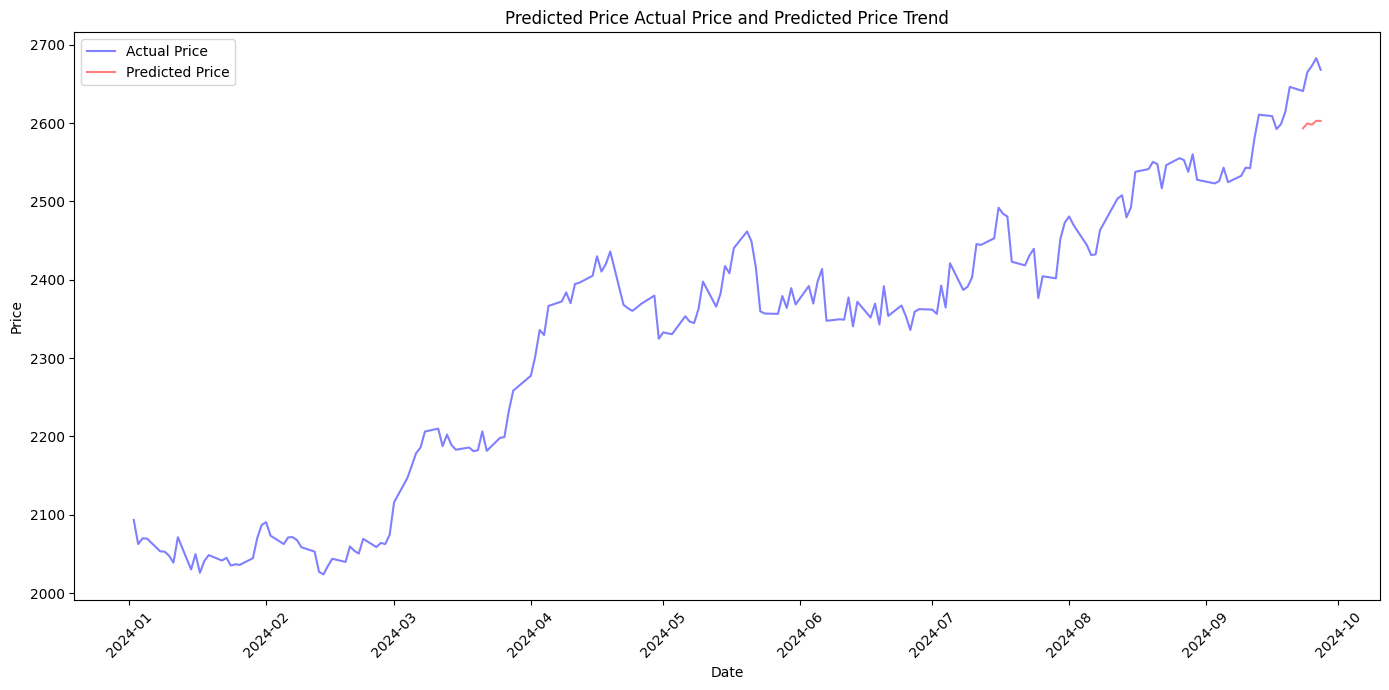

In [ ]:
visualize(results1)

In [ ]:
mse = mean_squared_error(results1['Actual Price'], results1['Predicted Price'])
print(f'\nMean Squared Error between actual and predicted prices: {mse:.2f}')


Mean Squared Error between actual and predicted prices: 4568.90


In [ ]:
# 设定预测集的时间范围
predict_start_date2 = pd.to_datetime('2024-08-27')
predict_end_date2 = pd.to_datetime('2024-09-27')

# 选择预测数据
predict_data2 = data[(data['Data'] >= predict_start_date2) & (data['Data'] <= predict_end_date2)]

# 提取预测特征
X_predict2 = predict_data2[['Year', 'Month', 'Day', 'Weekday']]

# 在预测集上进行预测
y_predict2 = model.predict(X_predict2)

# 打印预测结果
results2 = pd.DataFrame({
    'Date': predict_data2['Data'].values,
    'Actual Price': predict_data2['Price'].values,
    'Predicted Price': y_predict2
})

pd.set_option('display.max_rows', None)  # 显示所有行
pd.set_option('display.max_columns', None)  # 显示所有列

print("\nThe results are:")
print(results2)


The results are:
         Date  Actual Price  Predicted Price
0  2024-09-27        2668.1      2602.759033
1  2024-09-26        2682.9      2602.938477
2  2024-09-25        2673.0      2597.999023
3  2024-09-24        2665.2      2599.685303
4  2024-09-23        2640.9      2593.319580
5  2024-09-20        2646.2      2599.611572
6  2024-09-19        2614.6      2595.134521
7  2024-09-18        2598.6      2591.243652
8  2024-09-17        2592.4      2605.087891
9  2024-09-16        2608.9      2603.003418
10 2024-09-13        2610.7      2583.059814
11 2024-09-12        2580.6      2595.971924
12 2024-09-11        2542.4      2582.407959
13 2024-09-10        2543.1      2580.877686
14 2024-09-09        2532.7      2563.665039
15 2024-09-06        2524.6      2582.660156
16 2024-09-05        2543.1      2577.015625
17 2024-09-04        2526.0      2564.552490
18 2024-09-03        2523.0      2567.585938
19 2024-08-30        2527.6      2507.392822
20 2024-08-29        2560.3      2506

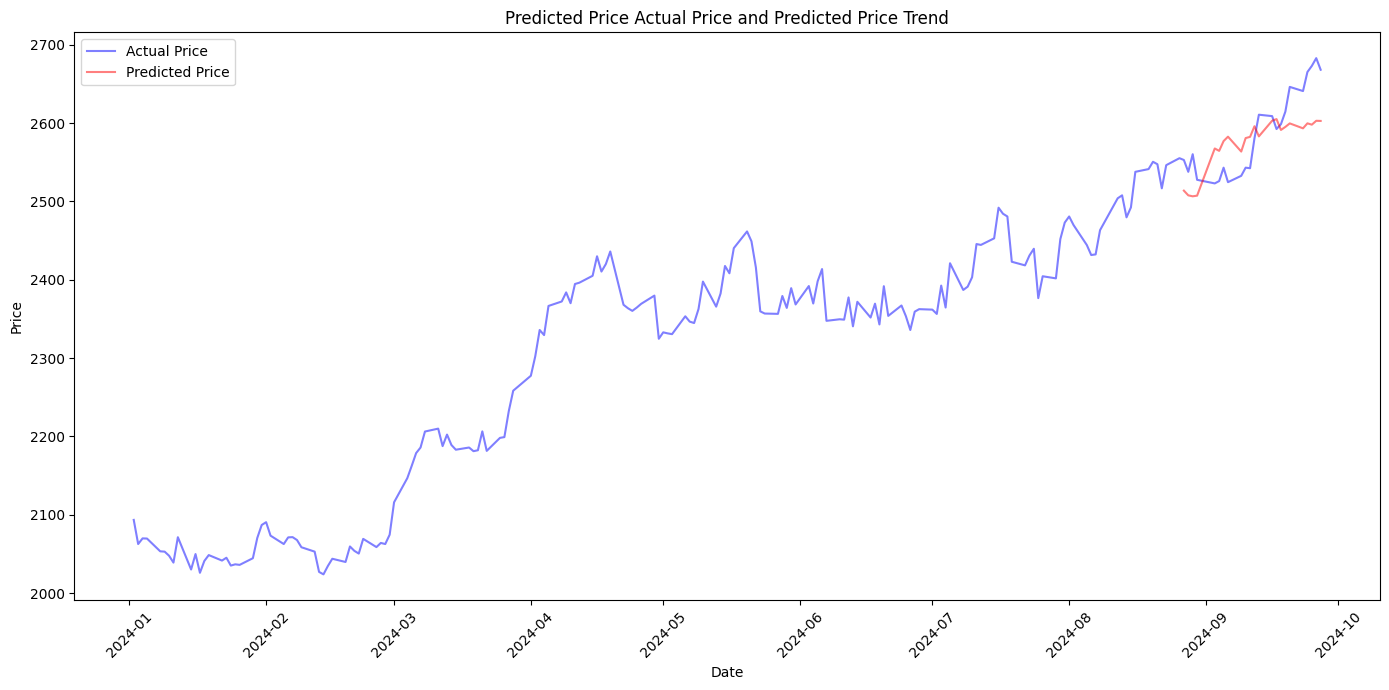

In [ ]:
visualize(results2)

In [ ]:
mse = mean_squared_error(results2['Actual Price'], results2['Predicted Price'])
print(f'\nMean Squared Error between actual and predicted prices: {mse:.2f}')


Mean Squared Error between actual and predicted prices: 1928.51


In [ ]:
# 设定预测集的时间范围
predict_start_date3 = pd.to_datetime('2024-06-27')
predict_end_date3 = pd.to_datetime('2024-09-27')

# 选择预测数据
predict_data3 = data[(data['Data'] >= predict_start_date3) & (data['Data'] <= predict_end_date3)]

# 提取预测特征
X_predict3 = predict_data3[['Year', 'Month', 'Day', 'Weekday']]

# 在预测集上进行预测
y_predict3 = model.predict(X_predict3)

# 打印预测结果
results3 = pd.DataFrame({
    'Date': predict_data3['Data'].values,
    'Actual Price': predict_data3['Price'].values,
    'Predicted Price': y_predict3
})

pd.set_option('display.max_rows', None)  # 显示所有行
pd.set_option('display.max_columns', None)  # 显示所有列

print("\nThe results are:")
print(results3)


The results are:
         Date  Actual Price  Predicted Price
0  2024-09-27        2668.1      2602.759033
1  2024-09-26        2682.9      2602.938477
2  2024-09-25        2673.0      2597.999023
3  2024-09-24        2665.2      2599.685303
4  2024-09-23        2640.9      2593.319580
5  2024-09-20        2646.2      2599.611572
6  2024-09-19        2614.6      2595.134521
7  2024-09-18        2598.6      2591.243652
8  2024-09-17        2592.4      2605.087891
9  2024-09-16        2608.9      2603.003418
10 2024-09-13        2610.7      2583.059814
11 2024-09-12        2580.6      2595.971924
12 2024-09-11        2542.4      2582.407959
13 2024-09-10        2543.1      2580.877686
14 2024-09-09        2532.7      2563.665039
15 2024-09-06        2524.6      2582.660156
16 2024-09-05        2543.1      2577.015625
17 2024-09-04        2526.0      2564.552490
18 2024-09-03        2523.0      2567.585938
19 2024-08-30        2527.6      2507.392822
20 2024-08-29        2560.3      2506

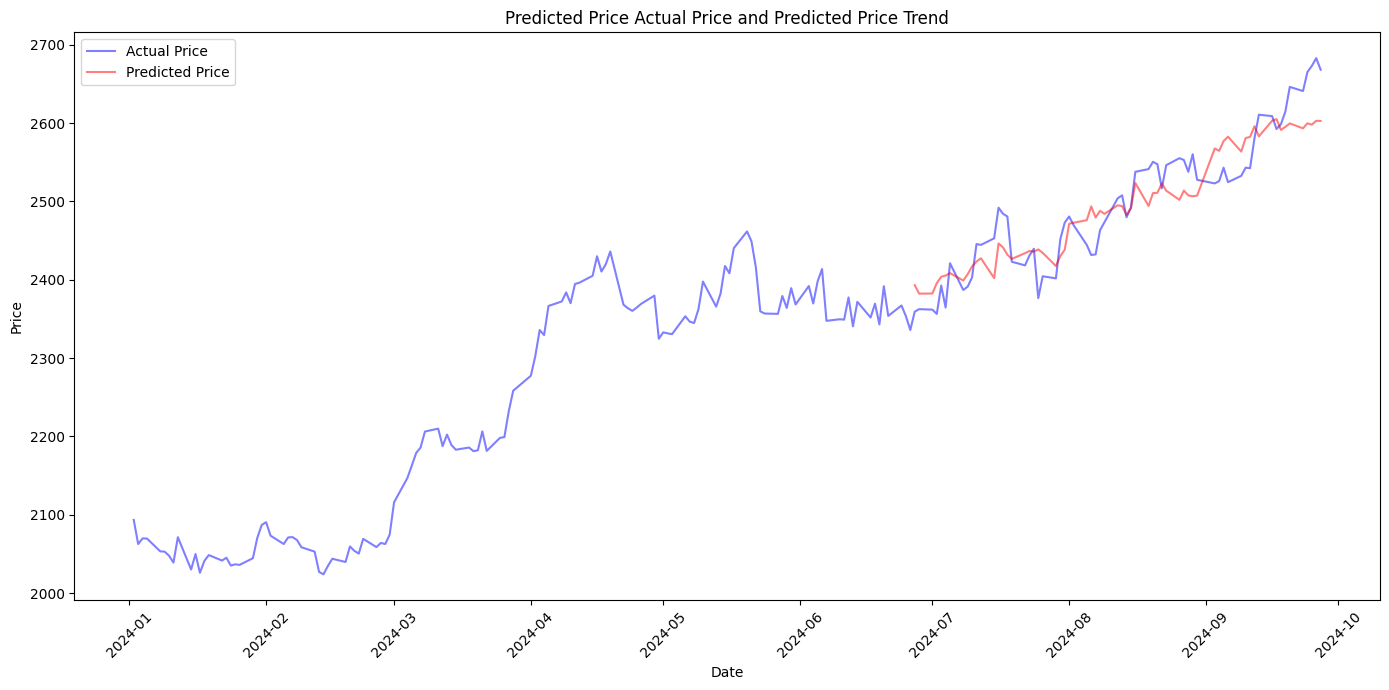

In [ ]:
visualize(results3)

In [ ]:
mse = mean_squared_error(results3['Actual Price'], results3['Predicted Price'])
print(f'\nMean Squared Error between actual and predicted prices: {mse:.2f}')


Mean Squared Error between actual and predicted prices: 1280.17


In [ ]:
# 使用模型进行预测
future_dates = pd.date_range(start=data['Data'].max() + timedelta(days=1), periods=2 * 30, freq='B')
future_data = pd.DataFrame({'Data': future_dates})
future_data['Year'] = future_data['Data'].dt.year
future_data['Month'] = future_data['Data'].dt.month
future_data['Day'] = future_data['Data'].dt.day
future_data['Weekday'] = future_data['Data'].dt.weekday
future_prices = model.predict(future_data[['Year', 'Month', 'Day', 'Weekday']])
for date, price in zip(future_data['Data'], future_prices):
  print(f"Date: {date.date()}, Predicted Price: {price:.2f}")

Date: 2024-09-30, Predicted Price: 2586.92
Date: 2024-10-01, Predicted Price: 2554.17
Date: 2024-10-02, Predicted Price: 2560.27
Date: 2024-10-03, Predicted Price: 2572.91
Date: 2024-10-04, Predicted Price: 2565.10
Date: 2024-10-07, Predicted Price: 2559.47
Date: 2024-10-08, Predicted Price: 2570.72
Date: 2024-10-09, Predicted Price: 2571.62
Date: 2024-10-10, Predicted Price: 2586.21
Date: 2024-10-11, Predicted Price: 2582.96
Date: 2024-10-14, Predicted Price: 2562.77
Date: 2024-10-15, Predicted Price: 2573.82
Date: 2024-10-16, Predicted Price: 2610.95
Date: 2024-10-17, Predicted Price: 2610.42
Date: 2024-10-18, Predicted Price: 2591.79
Date: 2024-10-21, Predicted Price: 2591.11
Date: 2024-10-22, Predicted Price: 2605.68
Date: 2024-10-23, Predicted Price: 2601.27
Date: 2024-10-24, Predicted Price: 2605.01
Date: 2024-10-25, Predicted Price: 2598.55
Date: 2024-10-28, Predicted Price: 2587.84
Date: 2024-10-29, Predicted Price: 2589.24
Date: 2024-10-30, Predicted Price: 2594.87
Date: 2024-

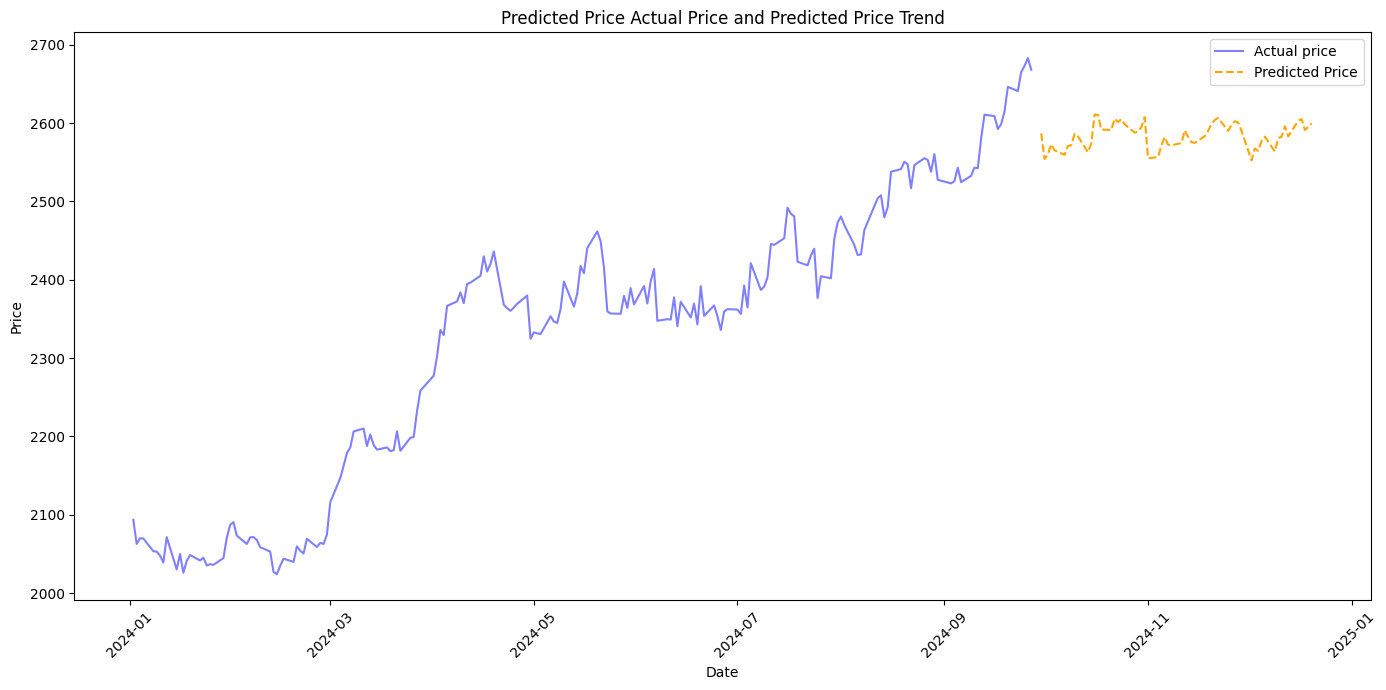

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(data['Data'], data['Price'], label='Actual price', color='blue', alpha=0.5)
plt.plot(future_data['Data'], future_prices, label='Predicted Price', color='orange', linestyle='--')

plt.title('Predicted Price Actual Price and Predicted Price Trend')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()